In [4]:
# %pip install xgboost
# %pip install imblearn

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np 
import xgboost as xgb 
from sklearn.metrics import classification_report, roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split


In [6]:
np.random.seed(42) ## do not generate random number take same number always 


In [7]:
n_samples_1 = 25 
n_samples_2 = 375  
centers = [(0,0),(2,2)] # centers of each cluster 
cluster_std = [1.5,1.5] # std of each cluster 
X,y = make_blobs(n_samples=[n_samples_1,n_samples_2],
                 centers = centers,  cluster_std=cluster_std, 
                 random_state=0)


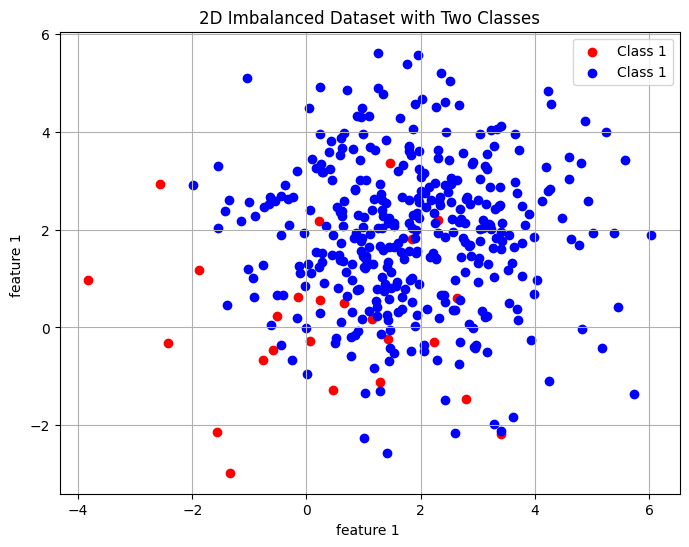

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X[y == 0][:,0], X[y == 0][:,1],color ='red', label = 'Class 1')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1],color ='blue', label = 'Class 1')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('feature 1 ')
plt.ylabel('feature 1 ')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,roc_auc_score,roc_curve


## Split dataset into training and testing sets
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

y_proba = lr.predict_proba(X_test)[:,1]

print("Classification Report :")
print(classification_report(y_test,y_pred))
print("Roc AuC score", roc_auc_score(y_test,y_proba))


Classification Report :
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.96      0.99      0.97        76

    accuracy                           0.95        80
   macro avg       0.73      0.62      0.65        80
weighted avg       0.94      0.95      0.94        80

Roc AuC score 0.9473684210526316


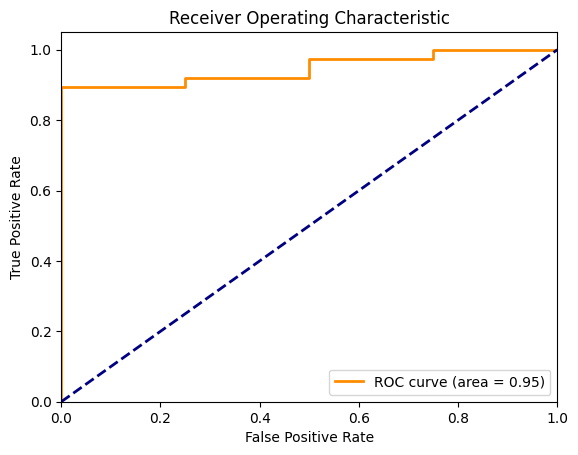

In [12]:
## plotting Roc AUC Curve 
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


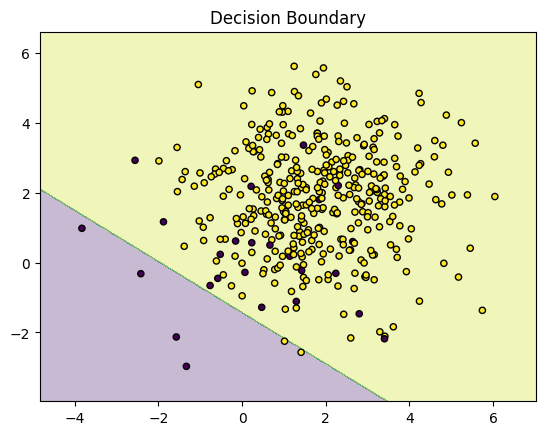

In [14]:

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, lr)

### Random UnderSampling 

In [15]:
from imblearn.under_sampling import RandomUnderSampler

#split data into Training and testing sets  
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=32)

## Applying Random Over Sampling 
rus = RandomUnderSampler(random_state=42)
X_resampled , y_resampled = rus.fit_resample(X_train,y_train)

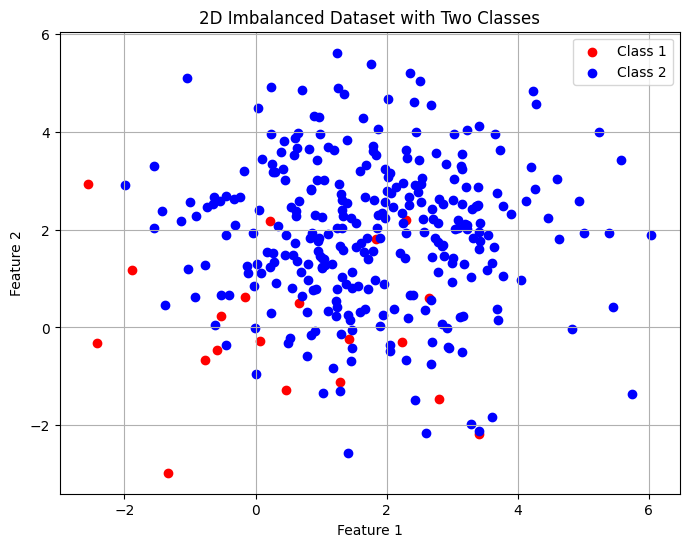

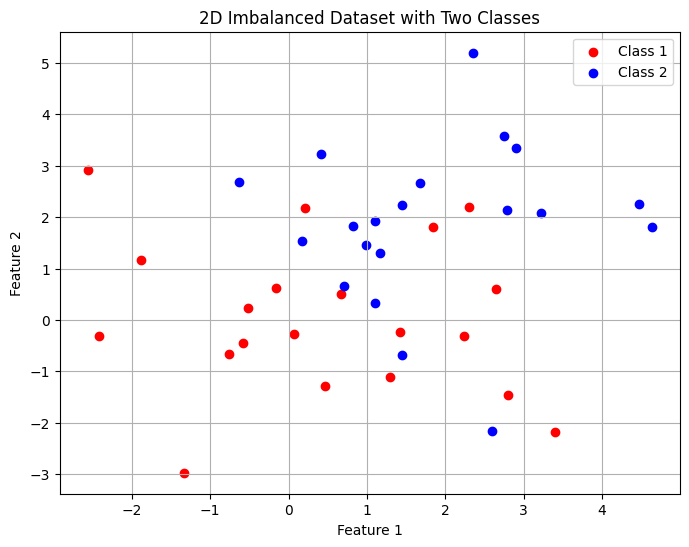

In [16]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
X_train.shape, X_resampled.shape

((320, 2), (40, 2))

In [20]:
import pandas as pd 
pd.Series(y_train).value_counts()

1    300
0     20
Name: count, dtype: int64

In [21]:
pd.Series(y_resampled).value_counts()

0    20
1    20
Name: count, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression

lr_rus = LogisticRegression()
lr_rus.fit(X_resampled,y_resampled)

y_pred_rus = lr_rus.predict(X_test)
y_proba_rus = lr_rus.predict_proba(X_test)[:,1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_rus))
print("ROC AUC Score (With Over Sampling):", roc_auc_score(y_test, y_proba_rus))


Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.27      0.80      0.40         5
           1       0.98      0.85      0.91        75

    accuracy                           0.85        80
   macro avg       0.63      0.83      0.66        80
weighted avg       0.94      0.85      0.88        80

ROC AUC Score (With Over Sampling): 0.8133333333333332


### Random Oversampling 

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

X_train.shape,X_resampled.shape

((320, 2), (600, 2))

In [28]:
pd.Series(y_train).value_counts()


1    300
0     20
Name: count, dtype: int64

In [29]:
pd.Series(y_resampled).value_counts()

1    300
0    300
Name: count, dtype: int64

In [30]:
classifier_ros = LogisticRegression()
classifier_ros.fit(X_resampled, y_resampled)

# Predict test set
y_pred_ros = classifier_ros.predict(X_test)
y_proba_ros = classifier_ros.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_ros))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Over Sampling):", roc_auc_score(y_test, y_proba_ros))

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.25      0.80      0.38         5
           1       0.98      0.84      0.91        75

    accuracy                           0.84        80
   macro avg       0.62      0.82      0.64        80
weighted avg       0.94      0.84      0.87        80

ROC AUC Score (With Over Sampling): 0.808


In [31]:
from imblearn.over_sampling import SMOTE 

In [ ]:
smote = SMOTE(random_state=42)

X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train,y_train)

X_resampled_smote.shape,y_resampled_smote.shape


((600, 2), (600,))

In [37]:
# pd.Series(y_resampled_smote).value_counts()
# pd.Series(X_resampled_smote).value_counts()

In [43]:
lr_smote = LogisticRegression()
lr_smote.fit(X_resampled_smote,y_resampled_smote)

y_pred_smote = lr_smote.predict(X_test)
y_proba_smote = lr_smote.predict_proba(X_test)

print("Classification Report (With SMOTE):")
print(classification_report(y_test,y_pred))

# print("ROC AUC Score (With SMOTE):",roc_auc_score(y_test, y_proba_smote))

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.94      0.97      0.95        75

    accuracy                           0.91        80
   macro avg       0.47      0.49      0.48        80
weighted avg       0.88      0.91      0.89        80



### Balanced Random Forest 

In [46]:
from imblearn.ensemble import BalancedRandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = BalancedRandomForestClassifier(random_state=42)
clf.fit(x_train,y_train)

y_pred_brf = clf.predict(x_test)
y_proba_brf = clf.predict_proba(x_test)[:,1]


# Print classification report for SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_brf))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_proba_brf))

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.13      0.50      0.21         4
           1       0.97      0.83      0.89        76

    accuracy                           0.81        80
   macro avg       0.55      0.66      0.55        80
weighted avg       0.93      0.81      0.86        80

ROC AUC Score (With SMOTE): 0.8273026315789473


In [ ]:
## Class Weights 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LogisticRegression(class_weight={0:50,1:1},solver = 'liblinear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print ROC AUC Score 
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.09      1.00      0.16         7
           1       1.00      0.37      0.54       113

    accuracy                           0.41       120
   macro avg       0.54      0.69      0.35       120
weighted avg       0.95      0.41      0.52       120

ROC AUC Score: 0.8931731984829331
